In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 60)
pd.set_option("display.width", 1000)

In [30]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

In [31]:
test_ids = test_df["Id"]
train_df = train_df.drop("Id", axis=1)
test_df = test_df.drop("Id", axis=1)

In [32]:
def check_df(dataframe, head=5):
    print("##### Shape #####" )
    print(dataframe.shape)
    print("##### Head #####" )
    print(dataframe.head(head))
    print("##### Tail #####" )
    print(dataframe.tail(head))
    print("##### Info #####" )
    print(dataframe.info())

In [ ]:
check_df(test_df)

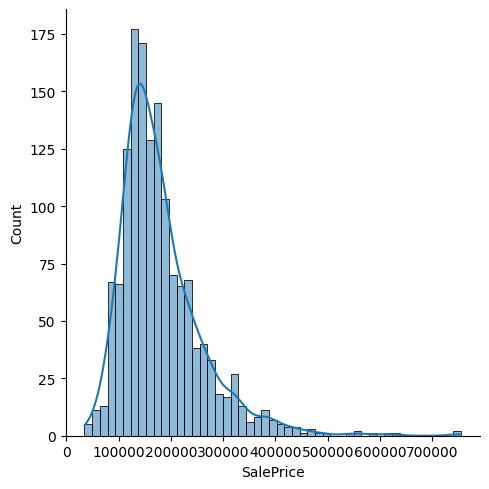

In [34]:
sns.displot(train_df["SalePrice"], kde=True);

In [35]:
train_df["SalePrice"].skew()

np.float64(1.8828757597682129)

In [36]:
train_df["SalePrice"].describe([0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99])

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
5%        88000.000000
10%      106475.000000
20%      124000.000000
30%      135500.000000
40%      147000.000000
50%      163000.000000
60%      179280.000000
70%      198620.000000
80%      230000.000000
90%      278000.000000
95%      326100.000000
99%      442567.010000
max      755000.000000
Name: SalePrice, dtype: float64

In [37]:
def grab_col_names(df, cat_th=10, car_th=20):
    cat_cols = [col for col in df.columns if df[col].dtype == 'O']
    num_but_cat = [col for col in df.columns if df[col].dtype != 'O' and df[col].nunique() < cat_th]
    cat_but_car = [col for col in df.columns if df[col].dtype == 'O' and df[col].nunique() > car_th]
    
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    num_cols = [col for col in df.columns if df[col].dtype != 'O']
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    print(f"Categorical columns: {cat_cols}")
    print(f"Numerical columns: {num_cols}")
    print(f"High cardinality columns: {cat_but_car}")
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(train_df)

Categorical columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'PoolArea', 'YrSold']
Numerical columns: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt', 'Gar

## Numerical Columns Analysis

In [38]:
def num_cols_analysis(df, column, plot=True):
    print(f"##### {column} #####")
    print(df[column].describe([0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]))
    
    if plot:
        plt.hist(df[column])
        plt.xlabel(column)
        plt.tight_layout()
        plt.show()

In [ ]:
for col in num_cols:  
    num_cols_analysis(train_df, col)

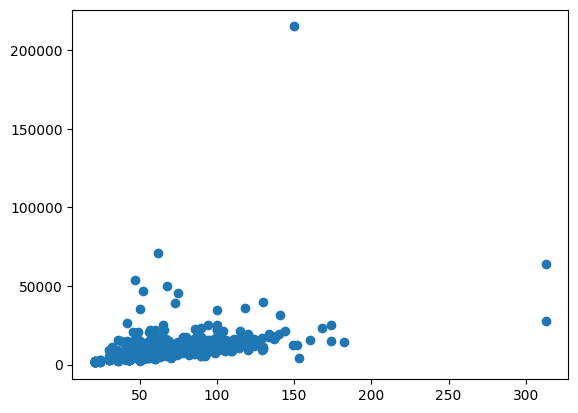

In [40]:
plt.scatter(x=train_df["LotFrontage"], y=train_df["LotArea"]);

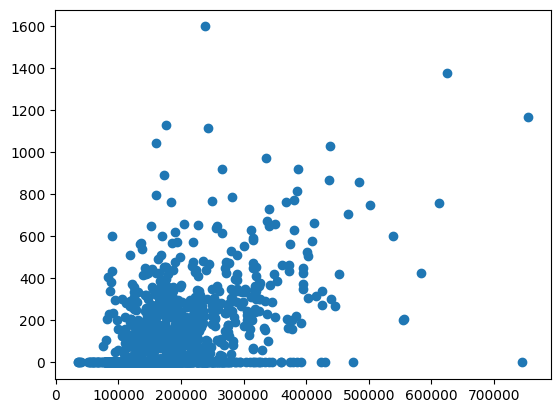

In [41]:
plt.scatter(train_df["SalePrice"], train_df["MasVnrArea"]);

In [42]:
train_df.loc[train_df["LotFrontage"] > 300] # remove 935 and 1299

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,Inside,Mod,NAmes,PosA,Norm,1Fam,1Story,7,7,1960,2007,Flat,Tar&Grv,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,425,Unf,0,160,585,GasA,Ex,Y,SBrkr,2069,0,0,2069,1,0,2,0,4,1,Gd,9,Typ,1,Gd,Attchd,1960.0,RFn,2,505,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [43]:
train_df.loc[train_df["LotArea"] > 200000] # remove 314

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236,Rec,820,80,2136,GasW,TA,Y,SBrkr,2036,0,0,2036,2,0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1965.0,RFn,2,513,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000


In [44]:
train_df.loc[train_df["MasVnrArea"] > 1500] # remove 298

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,1997,1998,Hip,CompShg,VinylSd,VinylSd,BrkFace,1600.0,Gd,TA,PConc,Gd,TA,No,BLQ,649,Unf,0,326,975,GasA,Ex,Y,SBrkr,975,975,0,1950,0,0,2,1,3,1,Gd,7,Typ,1,TA,Detchd,1997.0,RFn,2,576,TA,TA,Y,0,10,0,0,198,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000


In [45]:
train_df.loc[train_df["BsmtFinSF1"] > train_df["BsmtFinSF1"].quantile(0.99)]["BsmtFinSF1"].sort_values(ascending=False) # remove 1299

1298    5644
523     2260
898     2188
1182    2096
178     1904
70      1880
53      1810
440     1767
664     1721
654     1696
987     1646
825     1636
326     1619
454     1606
251     1573
Name: BsmtFinSF1, dtype: int64

In [46]:
for col in num_cols:
    print(train_df.loc[train_df[col] > train_df[col].quantile(0.99)][col].sort_values(ascending=False))

Series([], Name: MSSubClass, dtype: int64)
1298    313.0
934     313.0
1127    182.0
197     174.0
231     174.0
1107    168.0
1182    160.0
1337    153.0
1211    152.0
313     150.0
909     149.0
807     144.0
Name: LotFrontage, dtype: float64
313     215245
335     164660
249     159000
706     115149
451      70761
1298     63887
1396     57200
769      53504
457      53227
384      53107
53       50271
661      46589
848      45600
523      40094
271      39104
Name: LotArea, dtype: int64
Series([], Name: OverallQual, dtype: int64)
378    2010
Name: YearBuilt, dtype: int64
157    2010
378    2010
819    2010
855    2010
898    2010
987    2010
Name: YearRemodAdd, dtype: int64
297     1600.0
1169    1378.0
691     1170.0
115     1129.0
70      1115.0
808     1047.0
58      1031.0
981      975.0
224      922.0
517      921.0
755      894.0
349      870.0
798      860.0
825      816.0
1298     796.0
Name: MasVnrArea, dtype: float64
1298    5644
523     2260
898     2188
1182    2096
1

In my opinion, 1299, 314, 298, 347, 692, 323 and 496 are huge outliers that should be removed from the dataset.

In [47]:
train_df['MSZoning'].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

## Categorical Columns Analysis

In [48]:
def cat_cols_analysis(df, col, plot=True):
    print(pd.DataFrame({col: df[col].value_counts(),
                        "Ratio": df[col].value_counts() * 100 / len(df)}))
        
    if plot:
        sns.countplot(x=df[col], data=df)
        plt.show(block=True)

In [ ]:
for col in cat_cols:   
    cat_cols_analysis(train_df, col)

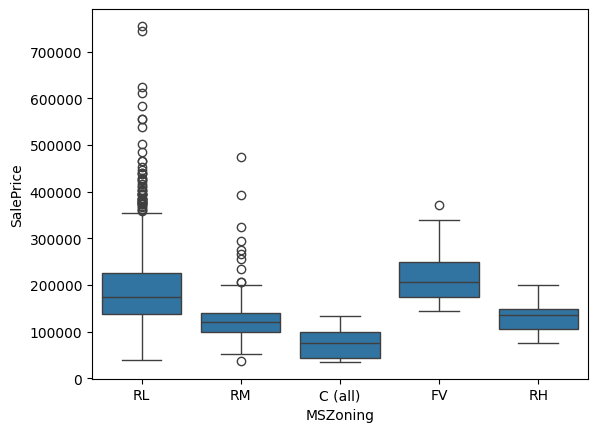

In [50]:
sns.boxplot(x="MSZoning", y="SalePrice", data=train_df);

## Missing Value Analysis

In [51]:
def missing_values_table(df):
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (
        df[na_columns].isnull().sum() / df.shape[0] * 100
    ).sort_values(ascending=False)

    missing_df = pd.concat(
        [n_miss, np.round(ratio, 2)], axis=1, keys=["n_miss", "ratio"]
    )
    print(missing_df, end="\n")
    return missing_df

In [52]:
def visualize_missing_data(missing_df):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_df.index, y=missing_df["ratio"])
    plt.title("Missing Data Ratio per Column")
    plt.xlabel("Columns")
    plt.ylabel("Missing Ratio (%)")
    plt.xticks(rotation=90)  
    plt.show()

In [53]:
missing_train_df = missing_values_table(train_df)
missing_test_df = missing_values_table(test_df)

              n_miss  ratio
PoolQC          1453  99.52
MiscFeature     1406  96.30
Alley           1369  93.77
Fence           1179  80.75
MasVnrType       872  59.73
FireplaceQu      690  47.26
LotFrontage      259  17.74
GarageType        81   5.55
GarageYrBlt       81   5.55
GarageFinish      81   5.55
GarageQual        81   5.55
GarageCond        81   5.55
BsmtExposure      38   2.60
BsmtFinType2      38   2.60
BsmtQual          37   2.53
BsmtCond          37   2.53
BsmtFinType1      37   2.53
MasVnrArea         8   0.55
Electrical         1   0.07
              n_miss  ratio
PoolQC          1456  99.79
MiscFeature     1408  96.50
Alley           1352  92.67
Fence           1169  80.12
MasVnrType       894  61.27
FireplaceQu      730  50.03
LotFrontage      227  15.56
GarageQual        78   5.35
GarageCond        78   5.35
GarageYrBlt       78   5.35
GarageFinish      78   5.35
GarageType        76   5.21
BsmtCond          45   3.08
BsmtQual          44   3.02
BsmtExposure      44

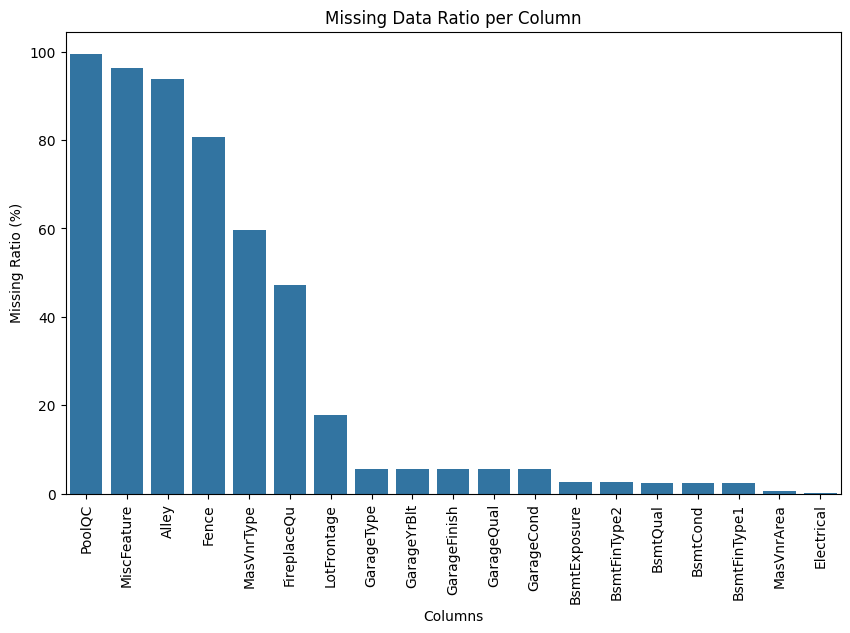

In [54]:
visualize_missing_data(missing_train_df)

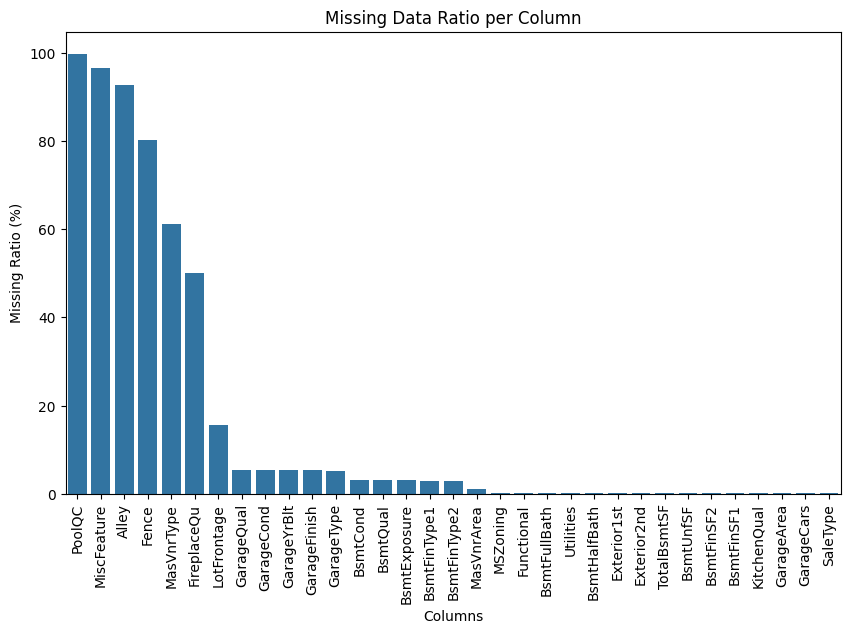

In [55]:
visualize_missing_data(missing_test_df)